<a href="https://colab.research.google.com/github/bsse1027/Stock-Market-Predictor/blob/main/Stock_Predictor_2nd_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [216]:
df =  pd.read_csv('new_BDPLANT.csv')
print(df.shape)
df = df.loc[df["date"]!='date']
df.shape

(624, 12)


(622, 12)

In [217]:
df.dtypes

Unnamed: 0                  object
date                        object
trading_code                object
last_traded_price           object
high                        object
low                         object
opening_price               object
closing_price               object
yesterdays_closing_price    object
trade                       object
value_mn                    object
volume                      object
dtype: object

In [218]:
#df.date = pd.to_datetime(df.date,infer_datetime_format=True)

In [219]:
df

,Unnamed: 0,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
0,10111,2008-12-30,BDPLANT,0.0,0.0,0.0,1850.0,1850.0,1850.0,0,0.0,0
1,10112,2008-12-28,BDPLANT,0.0,0.0,0.0,1850.0,1850.0,1850.0,0,0.0,0
2,10113,2008-12-24,BDPLANT,0.0,0.0,0.0,1850.0,1850.0,1850.0,0,0.0,0
3,10114,2008-12-23,BDPLANT,0.0,0.0,0.0,1850.0,1850.0,1850.0,0,0.0,0
4,10115,2008-12-22,BDPLANT,0.0,0.0,0.0,1850.0,1850.0,1850.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
619,11856,2010-01-07,BDPLANT,0.0,0.0,0.0,2112.0,2112.0,2112.0,0.0,0.0,0.0
620,11857,2010-01-06,BDPLANT,0.0,0.0,0.0,2112.0,2112.0,2112.0,0.0,0.0,0.0
621,11858,2010-01-05,BDPLANT,0.0,0.0,0.0,2112.0,2112.0,2112.0,0.0,0.0,0.0
622,11859,2010-01-04,BDPLANT,0.0,0.0,0.0,2112.0,2112.0,2112.0,0.0,0.0,0.0


In [220]:
df = df.drop(['trading_code','Unnamed: 0','date'],axis=1)
df.dtypes

last_traded_price           object
high                        object
low                         object
opening_price               object
closing_price               object
yesterdays_closing_price    object
trade                       object
value_mn                    object
volume                      object
dtype: object

In [221]:
df.dtypes
df.apply(pd.to_numeric).dtypes
#df.to_csv('/Modified_Deshbandhu.csv', encoding='utf-8', index=False)

last_traded_price           float64
high                        float64
low                         float64
opening_price               float64
closing_price               float64
yesterdays_closing_price    float64
trade                       float64
value_mn                    float64
volume                      float64
dtype: object

In [222]:
from sklearn import metrics
final_prediction=[]
actual_value=[]
root_mse=0
df1 = df.copy()
X = df.drop(['last_traded_price','closing_price'],axis=1)
y = df.closing_price
kf = KFold(n_splits=5)
for Fold,(id_tr,id_te) in enumerate(kf.split(X,y)):
    X_train = X.iloc[id_tr]
    X_test = X.iloc[id_te]
    y_train = y.iloc[id_tr]
    y_test = y.iloc[id_te]
    LR = LinearRegression()
    LR.fit(X_train,y_train)
    y_pred = LR.predict(X_test)
    final_prediction.append(y_pred)
    actual_value.append(np.array(y_test))
    root_mse+= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    #mse_value.append(root_mse)
    #for itr in range(len(y_test)):
    #print(f"Actual: {y_test[itr]}, Predicted: {y_pred[itr]} \n")
print("Average RMSE Value: ", root_mse/5)
    

Average RMSE Value:  34.94390048105185


In [223]:
result =[]
for i in range(len(final_prediction)):
  for f in range(len(final_prediction[i])):
    if float(actual_value[i][f])<=0.0:
      continue
    result1=(abs(final_prediction[i][f] - float(actual_value[i][f]))/float(actual_value[i][f]))*100
    result.append(100 - result1)
print("The Average Prediction Accuracy is: ",np.mean(result))

The Average Prediction Accuracy is:  99.69741461496822


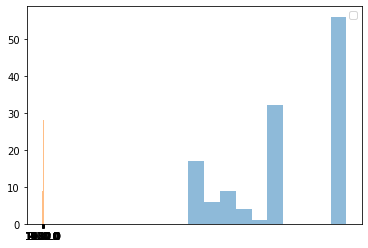

In [224]:
#hist1=pd.DataFrame(y_pred).hist()
#hist2=pd.DataFrame(y_test).hist()
plt.hist(final_prediction[1],alpha=0.5)
plt.hist(actual_value[1],alpha=0.5)
plt.legend()
plt.show()